# EDA of Global Game Sales as of December 2016

In [42]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# Import csv
df = pd.read_csv('E:/GitHub/DataSets/Video_game_sales/Video_Games_Sales_as_at_22_Dec_2016.csv')
# Review data
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [19]:
# Create a copy of the original data
df_copy = df.copy()

### What games have the highest sale based on region?

In [14]:
# top game global sales
sorted_df = df_copy.sort_values('Global_Sales', ascending=False)

game_with_highest_sales = sorted_df.iloc[0]['Name']

print('Game with the highest global sales:', game_with_highest_sales)

Game with the highest global sales: Wii Sports


In [49]:
# Knowing Wii sports is the most sold game what comes second globally
sorted_df = df_copy.sort_values('Global_Sales', ascending=False)

game_with_highest_sales = sorted_df.iloc[1]['Name']

print('Game with the second highest global sales:', game_with_highest_sales)

Game with the second highest global sales: Super Mario Bros.


In [15]:
# North America top sales
NA_df = df_copy.sort_values('NA_Sales', ascending=False)

NA_sales = NA_df.iloc[0]['Name']

print('Game with the highest North American sales:', NA_sales)

Game with the highest North American sales: Wii Sports


In [52]:
# NA second highest sale
NA_df = df_copy.sort_values('NA_Sales', ascending=False)

NA_sales = NA_df.iloc[1]['Name']

print('Game with the Second highest North American sales:', NA_sales)

Game with the Second highest North American sales: Super Mario Bros.


In [16]:
# Europe top sales
EU_df = df_copy.sort_values('EU_Sales', ascending=False)

EU_sales = EU_df.iloc[0]['Name']

print('Game with the highest European sales:', EU_sales)

Game with the highest European sales: Wii Sports


In [51]:
# EU second highest sale
EU_df = df_copy.sort_values('EU_Sales', ascending=False)

EU_sales = EU_df.iloc[1]['Name']

print('Game with the second highest European sales:', EU_sales)

Game with the second highest European sales: Mario Kart Wii


In [34]:
# Japan top sales
JP_df = df_copy.sort_values('JP_Sales', ascending=False)

JP_sales = JP_df.iloc[0]['Name']

print('Game with the highest Japanese sales:', JP_sales)

Game with the highest Japanese sales: Pokemon Red/Pokemon Blue


### Which Genre has the highest sales?

In [48]:
# Highest grossing genre
genre_total = df_copy.groupby('Genre')['Global_Sales'].sum()
sorted_genre_total = genre_total.sort_values(ascending=False)
Max_genre = sorted_genre_total.index[0]

print('Top Genre by Sales:', Max_genre)

Top Genre by Sales: Action


### How have game sales evolved over the years? Are there any trends or patterns?

In [46]:
# Creating a copy and Grouping sales data then calculating the sum 
sales_data = df_copy[['Year_of_Release', 'Global_Sales']].copy()
yearly_sales = sales_data.groupby('Year_of_Release')['Global_Sales'].sum()

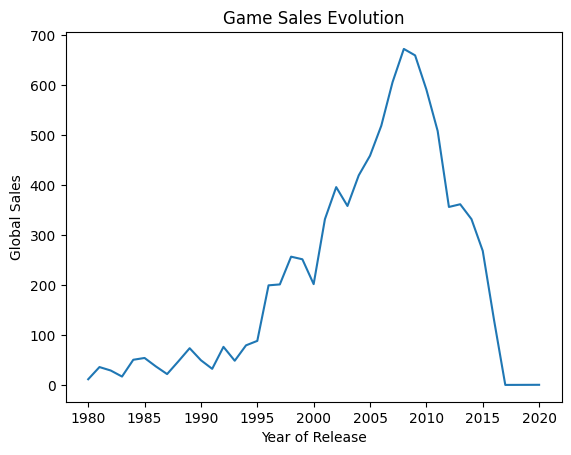

In [25]:
# Labeling and using a line plot
yearly_sales.plot(kind='line')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales')
plt.title('Game Sales Evolution')
plt.show()

### Which publishers have released the most games? Which publishers have the highest sales?

In [32]:
# Publishers release count
publisher_counts = df_copy['Publisher'].value_counts()
sorted_publishers = publisher_counts.sort_values(ascending=False)
top_publishers = sorted_publishers.head(10)

print(f'Top 10 Publishers by release count:\n{top_publishers}')

Top 10 Publishers by release count:
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
THQ                              715
Nintendo                         706
Sony Computer Entertainment      687
Sega                             638
Take-Two Interactive             422
Name: Publisher, dtype: int64


In [33]:
# Publisher highest sales
publisher_sales = df_copy.groupby('Publisher')['Global_Sales'].sum()
top_publisher_sales = publisher_sales.nlargest(10)

print(f'Top 10 Publishers by sales:\n{top_publisher_sales}')

Top 10 Publishers by sales:
Publisher
Nintendo                        1788.81
Electronic Arts                 1116.96
Activision                       731.16
Sony Computer Entertainment      606.48
Ubisoft                          471.61
Take-Two Interactive             403.82
THQ                              338.44
Konami Digital Entertainment     282.39
Sega                             270.35
Namco Bandai Games               254.62
Name: Global_Sales, dtype: float64


### Which developers have released the most successful games?

In [45]:
# Developers highest sales
dev_sales = df.groupby('Developer')['Global_Sales'].sum()
top_devs = dev_sales.nlargest(10)

print(f'Top 10 Developers by sales:\n{top_devs}')

Top 10 Developers by sales:
Developer
Nintendo             531.71
EA Sports            175.38
EA Canada            142.32
Ubisoft              132.54
Rockstar North       119.47
Capcom               115.71
Ubisoft Montreal     108.31
Treyarch             103.16
EA Tiburon            96.12
Traveller's Tales     79.22
Name: Global_Sales, dtype: float64


### How do game sales vary by region?


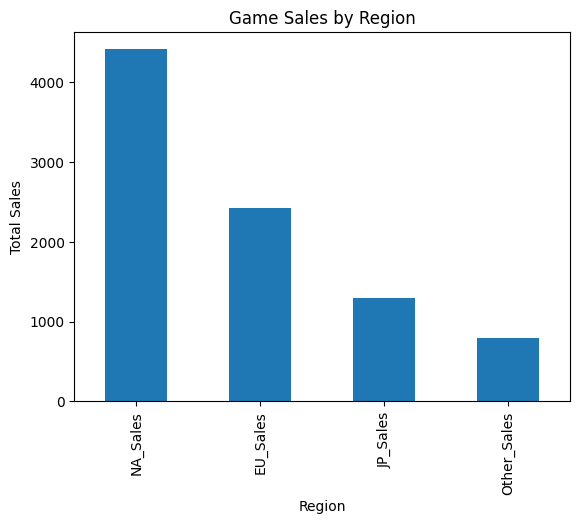

In [44]:
# Plot regions by sales
region_sales = df_copy[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

region_sales.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Game Sales by Region')
plt.show()

### Can we identify any outliers or anomalies in the sales data?

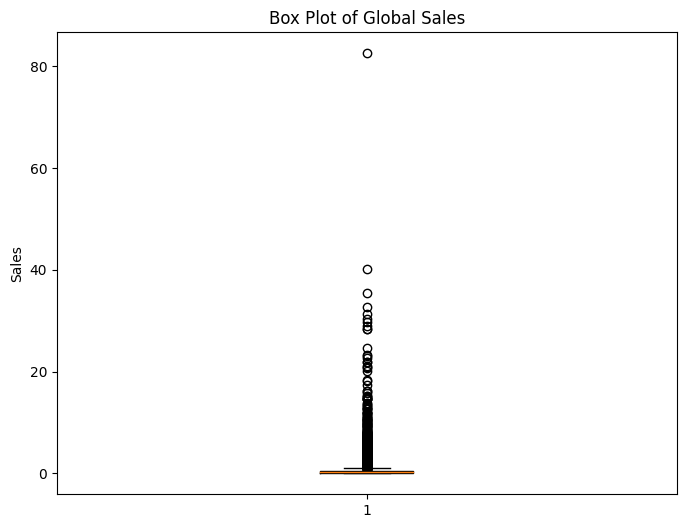

In [40]:
# Creating a box plot to search for obvious outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df_copy['Global_Sales'])
plt.title('Box Plot of Global Sales')
plt.ylabel('Sales')
plt.show()

In [41]:
# Identify outlier
outlier_data = df_copy[df_copy['Global_Sales'] > 60]
print(outlier_data)

         Name Platform  Year_of_Release   Genre Publisher  NA_Sales  EU_Sales  \
0  Wii Sports      Wii           2006.0  Sports  Nintendo     41.36     28.96   

   JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0      3.77         8.45         82.53          76.0          51.0   

   User_Score  User_Count Developer Rating  
0         8.0       322.0  Nintendo      E  
